# Analysis and Visualisation of Dataframe

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from DataTransform import DataTransform
from DataFrameTransform import DataFrameTransform
from datetime import datetime, timedelta
from Plotter import Plotter

transformed_df = pd.read_csv("loan_payments_data.csv")
transformer = DataTransform(transformed_df)
excess_symbol_columns = ['term']

for column in excess_symbol_columns:
    transformer.remove_excess_symbols(column)

date_columns = ['issue_date', 'earliest_credit_line', 'last_payment_date', 'next_payment_date', 'last_credit_pull_date']

for column in date_columns:
    transformer.convert_to_datetime(column)

numeric_columns = ['term']

for column in numeric_columns:
    transformer.convert_to_numeric(column)

categorical_columns = ['home_ownership', 'grade', 'sub_grade', 'verification_status', 'loan_status', 'purpose', 'policy_code', 'application_type','employment_length']

for column in categorical_columns:
    transformer.convert_to_categorical(column)

category_to_numeric_columns = ['employment_length']

for column in category_to_numeric_columns:
    transformer.convert_categorical_to_numeric(column)

In [2]:
# Drop and impute null values of dataframe:

df = transformed_df.copy()

df = DataFrameTransform.drop_columns(df, threshold=50)

columns_to_impute_mean = ['funded_amount', 'term', 'int_rate']
df = DataFrameTransform.impute_mean(df, columns=columns_to_impute_mean)

categorical_columns_to_impute_mode = ['employment_length']
df = DataFrameTransform.impute_mode(df, columns=categorical_columns_to_impute_mode)


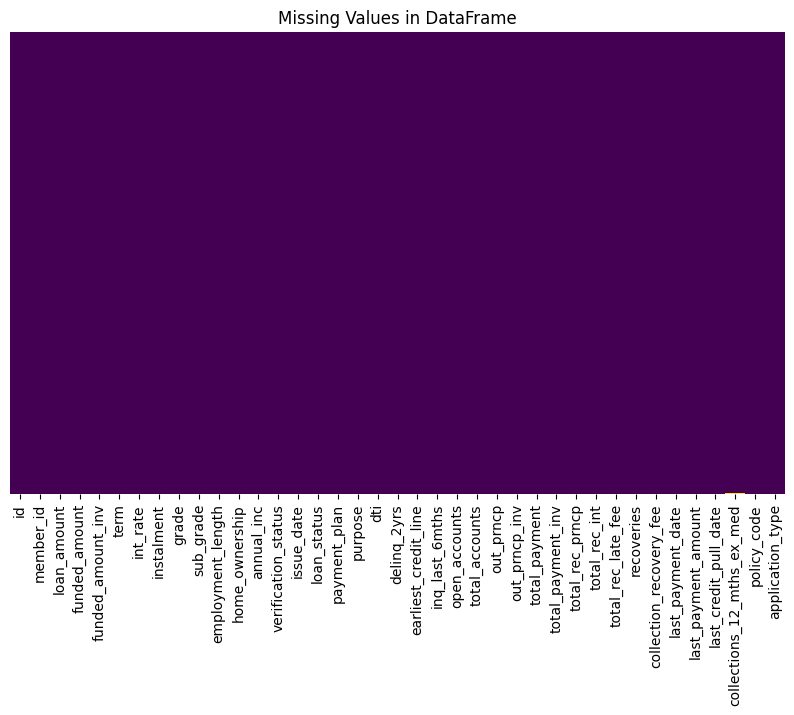

In [3]:
# Check the dropping and imputation has worked:
Plotter.plot_nulls(df)

### Full loans dataset schema

- **id**: unique id of the loan
- **member_id**: id of the member to took out the loan
- **loan_amount**: amount of loan the applicant received
- **funded_amount**: The total amount committed to the loan at the point in time 
- **funded_amount_inv**: The total amount committed by investors for that loan at that point in time 
- **term**: The number of monthly payments for the loan
- **int_rate**: Interest rate on the loan
- **instalment**: The monthly payment owned by the borrower
- **grade**: LC assigned loan grade
- **sub_grade**: LC assigned loan sub grade
- **employment_length**: Employment length in years.
- **home_ownership**: The home ownership status provided by the borrower
- **annual_inc**: The annual income of the borrower
- **verification_status**: Indicates whether the borrowers income was verified by the LC or the income source was verified
- **issue_date:** Issue date of the loan
- **loan_status**: Current status of the loan
- **payment_plan**: Indicates if a payment plan is in place for the loan. Indication borrower is struggling to pay.
- **purpose**: A category provided by the borrower for the loan request.
- **dti**: A ratio calculated using the borrowerâ€™s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrowerâ€™s self-reported monthly income.
- **delinq_2yr**: The number of 30+ days past-due payment in the borrower's credit file for the past 2 years.
- **earliest_credit_line**: The month the borrower's earliest reported credit line was opened
- **inq_last_6mths**: The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
- **mths_since_last_record**: The number of months since the last public record.
- **open_accounts**: The number of open credit lines in the borrower's credit file.
- **total_accounts**: The total number of credit lines currently in the borrower's credit file
- **out_prncp**: Remaining outstanding principal for total amount funded
- **out_prncp_inv**: Remaining outstanding principal for portion of total amount funded by investors
- **total_payment**: Payments received to date for total amount funded
- **total_rec_int**: Interest received to date
- **total_rec_late_fee**: Late fees received to date
- **recoveries**: post charge off gross recovery
- **collection_recovery_fee**: post charge off collection fee
- **last_payment_date**: Last month payment was received
- **last_payment_amount**: Last total payment amount received
- **next_payment_date**: Next scheduled payment date
- **last_credit_pull_date**: The most recent month LC pulled credit for this loan
- **collections_12_mths_ex_med**: Number of collections in 12 months excluding medical collections
- **mths_since_last_major_derog**: Months since most recent 90-day or worse rating
- **policy_code**: publicly available policy_code=1 new products not publicly available policy_code=2
- **application_type**: Indicates whether the loan is an individual application or a joint application with two co-borrowers

### Task 1: Current State if the Loans:
1. Summarise currently what percentage of the loans are recovered against the investor funding and the total amount funded. Visualise your results on an appropriate graph.

Total Funded Amount: 717449508.9142785
Total Recovered Amount: 5070668.343575974
Percentage of Recovery: 0.71%


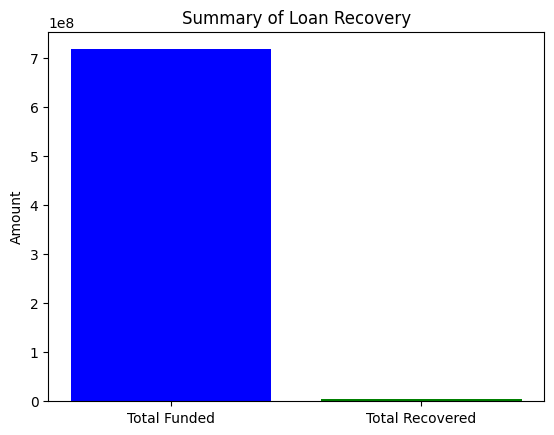

In [4]:
#This calculates only funded_amount vs recovery
funded_amount = df['funded_amount'].sum()
funded_amount_inv = df['funded_amount_inv'].sum()
recovered_amount = df['recoveries'].sum()

# Calculate percentage of recovery
percentage_recovery_1 = (recovered_amount / funded_amount) * 100
percentage_recovery_2 = (recovered_amount / funded_amount_inv) *100
print(f"Total Funded Amount: {funded_amount}")
print(f"Total Recovered Amount: {recovered_amount}")
print(f"Percentage of Recovery: {percentage_recovery_1:.2f}%")

# Visualise the results
labels = ['Total Funded', 'Total Recovered']
values = [funded_amount, recovered_amount]

fig, ax = plt.subplots()
ax.bar(labels, values, color=['blue', 'green'])
ax.set_ylabel('Amount')
ax.set_title('Summary of Loan Recovery')
plt.show()

Total Funded Amount by Investors: 702433696.7929696
Total Recovered Amount: 5070668.343575974
Percentage of Recovery: 0.72%


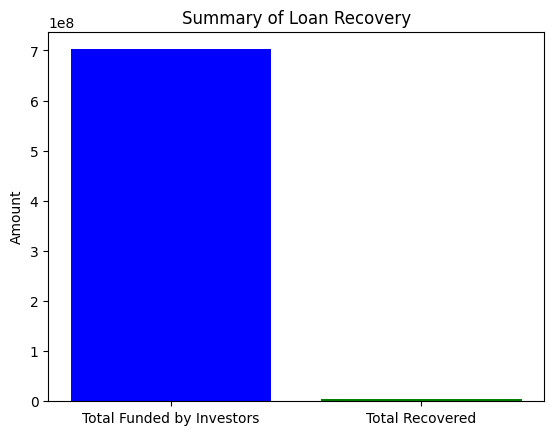

In [5]:
#This calculates only funded_amount_inv vs recovery

print(f"Total Funded Amount by Investors: {funded_amount_inv}")
print(f"Total Recovered Amount: {recovered_amount}")
print(f"Percentage of Recovery: {percentage_recovery_2:.2f}%")

labels = ['Total Funded by Investors', 'Total Recovered']
values = [funded_amount_inv, recovered_amount]

fig, ax = plt.subplots()
ax.bar(labels, values, color=['blue', 'green'])
ax.set_ylabel('Amount')
ax.set_title('Summary of Loan Recovery')
plt.show()

Total Funded Amount: 1419883205.7072482
Total Recovered Amount: 5070668.343575974
Percentage of Recovery: 0.36%


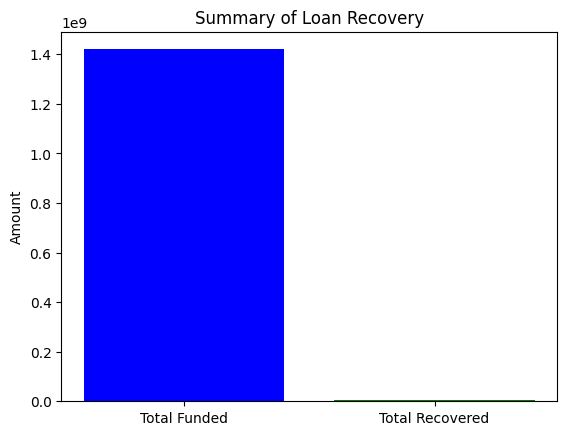

In [6]:
#This calculates both funded_amount and funded_amount_inv

total_funded_amount = df['funded_amount_inv'].sum() + df['funded_amount'].sum()

# Calculate total recovered amount
total_recovered_amount = df['recoveries'].sum()

# Calculate percentage of recovery
percentage_recovery = (total_recovered_amount / total_funded_amount) * 100

# Print summary
print(f"Total Funded Amount: {total_funded_amount}")
print(f"Total Recovered Amount: {total_recovered_amount}")
print(f"Percentage of Recovery: {percentage_recovery:.2f}%")

# Visualise the results
labels = ['Total Funded', 'Total Recovered']
values = [total_funded_amount, total_recovered_amount]

fig, ax = plt.subplots()
ax.bar(labels, values, color=['blue', 'green'])
ax.set_ylabel('Amount')
ax.set_title('Summary of Loan Recovery')
plt.show()

2. Additionally visualise what percentage of the total amount would be recovered up to 6 months' in the future.

Total Funded Amount in next 6 months: $722405125.00
Total Recovered Amount in next 6 months: $169781338.38
Percentage of Recovery in next 6 months: 23.50%


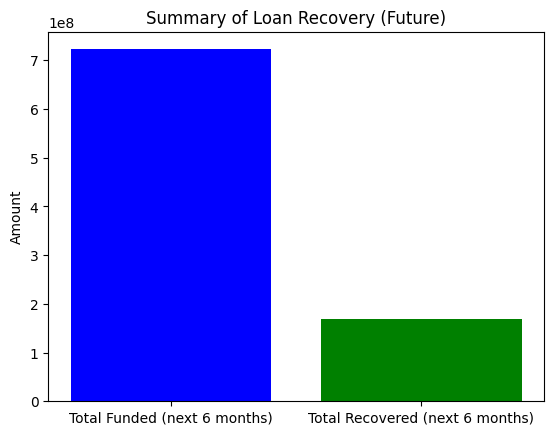

In [7]:
# Initialise variables for total funded amount and total recovered amount
total_funded_amount_future = 0
total_recovered_amount_future = 0

# Define the time horizon for future payments (6 months)
six_months_time = timedelta(days=6 * 30)

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    # Check if the loan has a last payment date
    
    # Calculate the projected recovery date
    projected_recovery_date = row['last_payment_date'] + six_months_time

    # Check if the projected recovery date is within the next 6 months
    if projected_recovery_date <= (datetime.now() + six_months_time):
        # Update total funded amount and total recovered amount
        total_funded_amount_future += row['loan_amount']
        total_recovered_amount_future += row['last_payment_amount']

# Calculate the percentage of recovery for future loans
percentage_recovery_future = (total_recovered_amount_future / total_funded_amount_future) * 100

# Print the summary for future loans
print(f"Total Funded Amount in next 6 months: ${total_funded_amount_future:.2f}")
print(f"Total Recovered Amount in next 6 months: ${total_recovered_amount_future:.2f}")
print(f"Percentage of Recovery in next 6 months: {percentage_recovery_future:.2f}%")

# Visualise the results for future loans
labels_future = ['Total Funded (next 6 months)', 'Total Recovered (next 6 months)']
values_future = [total_funded_amount_future, total_recovered_amount_future]

fig, ax = plt.subplots()
ax.bar(labels_future, values_future, color=['blue', 'green'])
ax.set_ylabel('Amount')
ax.set_title('Summary of Loan Recovery (Future)')
plt.show()

### Task 2: The company wants to check what percentage of loans have been a loss to the company:

3. Loans marked as Charged Off in the loan_status column represent a loss to the company. Calculate the percentage of charged off loans historically and the total amount that was paid towards these loans before being charged off.

In [8]:
# Filter only charged-off loans
charged_off_df = df[df['loan_status'] == 'Charged Off'].copy()

# Calculate the percentage of charged-off loans historically
charged_off_percentage = (charged_off_df.shape[0] / df.shape[0]) * 100

# Calculate the total amount paid towards charged-off loans
total_amount_paid_charged_off = charged_off_df['total_payment'].sum()

print(f"Percentage of Charged-Off Loans Historically: {charged_off_percentage:.2f}%")
print(f"Total Amount Paid Towards Charged-Off Loans: ${total_amount_paid_charged_off:.2f}")


Percentage of Charged-Off Loans Historically: 10.27%
Total Amount Paid Towards Charged-Off Loans: $37400589.04


#### Task 3: Calculating Projected Losses

4. Calculate the projected loss of the loans marked as Charged Off.

In [9]:
charged_off_loans = df[df['loan_status'] == 'Charged Off']

charged_off_loans_cost = charged_off_loans['recoveries'].sum() + charged_off_loans['collection_recovery_fee'].sum()

print(f"Projected loss of charged-off loans: ${charged_off_loans_cost:.2f}")


Projected loss of charged-off loans: $5387029.71


5. Calculate the loss in revenue these loans would have generated for the company if they had finished their term. Visualise the loss projected over the remaining term of these loans.

The projected loss in revenue from charged-off loans: $ 12557086.24


/var/folders/lw/1l9lnxr13r53tyytj7d7w0_80000gn/T/ipykernel_13736/2129810863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_loans['remaining_unpaid'] = charged_off_loans['out_prncp'] + charged_off_loans['out_prncp_inv'] + charged_off_loans['total_rec_int']


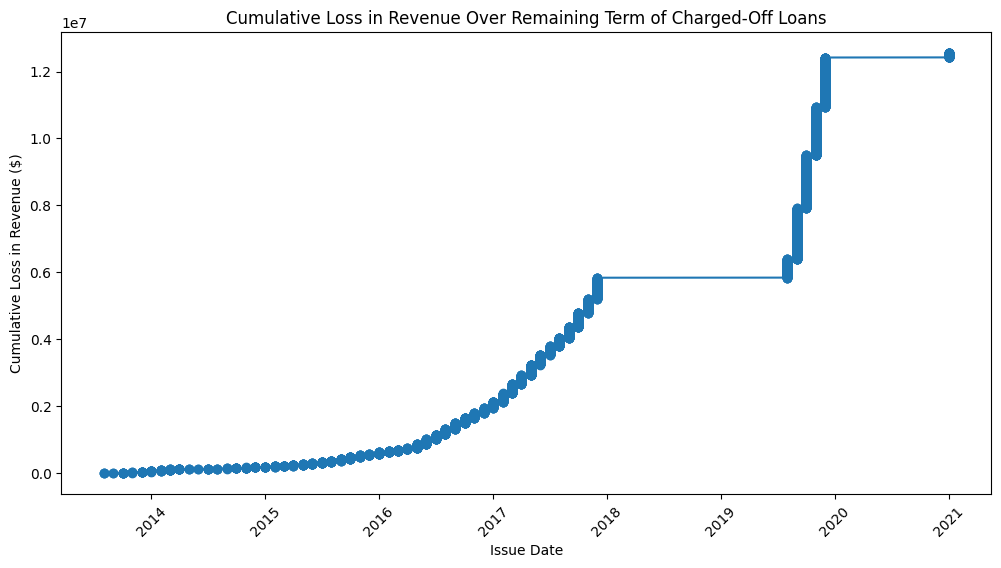

In [10]:
# Calculate the remaining unpaid principal and interest for each charged-off loan
charged_off_loans['remaining_unpaid'] = charged_off_loans['out_prncp'] + charged_off_loans['out_prncp_inv'] + charged_off_loans['total_rec_int']

# Sort the DataFrame by issue date
charged_off_loans = charged_off_loans.sort_values(by='issue_date')

# Calculate cumulative loss in revenue over the remaining term
charged_off_loans['cumulative_loss'] = charged_off_loans['remaining_unpaid'].cumsum()
cumulative_loss = charged_off_loans['remaining_unpaid'].sum()
print(f"The projected loss in revenue from charged-off loans: $ {cumulative_loss}")

# Visualise the cumulative loss over the remaining term
plt.figure(figsize=(12, 6))
plt.plot(charged_off_loans['issue_date'], charged_off_loans['cumulative_loss'], marker='o')
plt.title('Cumulative Loss in Revenue Over Remaining Term of Charged-Off Loans')
plt.xlabel('Issue Date')
plt.ylabel('Cumulative Loss in Revenue ($)')
plt.xticks(rotation=45)
plt.show()

### Task 4: Possible Loss

6. There are customers who are currently behind with their loan payments. This subset of customers represent a risk to company revenue. What percentage do users' in this bracket currently represent as a percentage of all loans? Calculate the total amount of customers in this bracket and how much loss the company would incur if their status was changed to Charged Off. What is the projected loss of these loans if the customer were to finish the full loans term?

In [11]:
# Filter customers currently behind on their loan payments
behind_customers = df[df['loan_status'].isin(['Late (31-120 days)', 'Late (16-30 days)', 'Default'])]

# Calculate the percentage of users currently behind on their loan payments
percentage_behind = (behind_customers.shape[0] / df.shape[0]) * 100

# Calculate the total number of customers in this bracket
total_behind_customers = behind_customers.shape[0]

# Calculate the loss the company would incur if their status was changed to Charged Off
loss_if_charged_off = behind_customers['total_payment'].sum()

# Calculate the projected loss if customers were to finish the full loan term
behind_customers['remaining_unpaid'] = behind_customers['out_prncp'] + behind_customers['out_prncp_inv'] + behind_customers['total_rec_int']
projected_loss_if_finished = behind_customers['remaining_unpaid'].sum()

print(f"Percentage of users currently behind on payments: {percentage_behind:.2f}%")
print(f"Total number of customers currently behind: {total_behind_customers}")
print(f"Loss if their status was changed to Charged Off: ${loss_if_charged_off:.2f}")
print(f"Projected loss if customers finish the full loan term: ${projected_loss_if_finished:.2f}")

Percentage of users currently behind on payments: 1.36%
Total number of customers currently behind: 738
Loss if their status was changed to Charged Off: $7391415.43
Projected loss if customers finish the full loan term: $15741046.84


/var/folders/lw/1l9lnxr13r53tyytj7d7w0_80000gn/T/ipykernel_13736/3136948092.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behind_customers['remaining_unpaid'] = behind_customers['out_prncp'] + behind_customers['out_prncp_inv'] + behind_customers['total_rec_int']


7. If customers late on payments converted to Charged Off, what percentage of total expected revenue do these customers and the customers who have already defaulted on their loan represent?

In [12]:
# Filter customers who are late on payments or have already defaulted
late_and_defaulted_customers = df[df['loan_status'].isin(['Late (31-120 days)', 'Late (16-30 days)', 'Default', 'Charged Off'])]

# Calculate the percentage of total expected revenue
total_expected_revenue = df['total_payment'].sum()
percentage_of_total_expected_revenue = (late_and_defaulted_customers['total_payment'].sum() / total_expected_revenue) * 100

print(f"Percentage of total expected revenue represented by late and defaulted customers: {percentage_of_total_expected_revenue:.2f}%")

Percentage of total expected revenue represented by late and defaulted customers: 6.84%


### Task 5: Indicators of loss:

8. In this task you will be analysing the data to visualise the possible indicators that a customer will not be able to pay the loan.


    You will want to compare columns which might be indicators against customers who have already stopped paying and customers who are currently behind on payments.


    Here are some example columns that might indicate that a user might not pay the loan:

    - Does the grade of the loan have effect on customers not paying?
    - Is the purpose for the loan likely to have an effect?
    - Does the home_ownership value contribute to the likelihood a customer won't pay?
    - To help identify which columns will be of interest, create a subset of these users.


    Make the analysis and determine the columns are contributing to loans not being paid off and visualise any interesting indicators.

    Compare these indicators between loans already charged off and loans which could change to charged off to check if these same factors apply to loans which have the potential to change to "Charged Off".

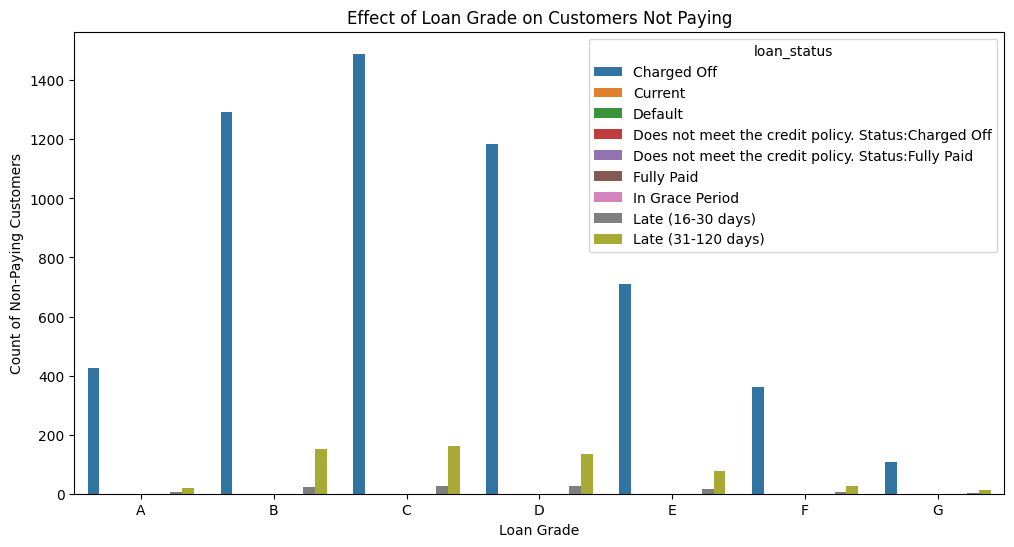

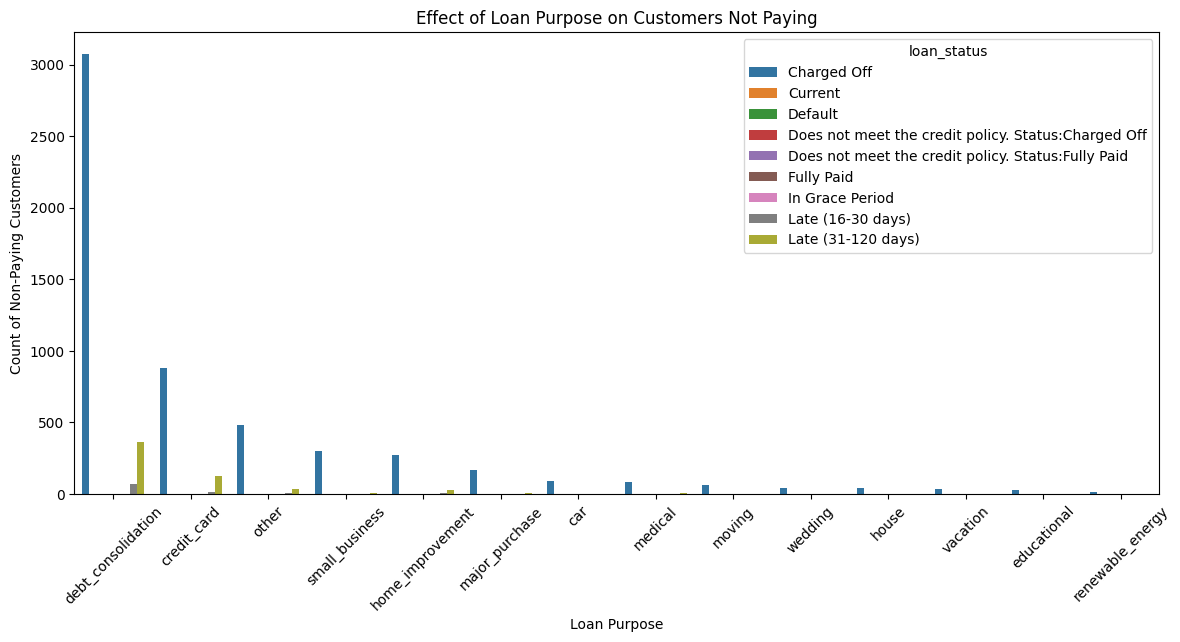

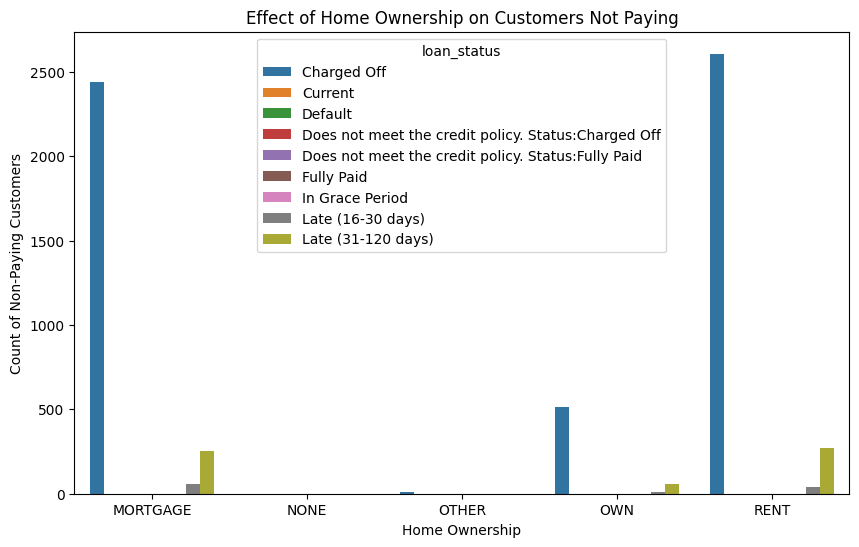

In [15]:
# Create a subset of users who are charged off or currently behind on payments
indicator_subset = df[df['loan_status'].isin(['Charged Off', 'Late (31-120 days)', 'Late (16-30 days)'])]

# Visualise the effect of loan grade on customers not paying
plt.figure(figsize=(12, 6))
sns.countplot(x='grade', hue='loan_status', data=indicator_subset)
plt.title('Effect of Loan Grade on Customers Not Paying')
plt.xlabel('Loan Grade')
plt.ylabel('Count of Non-Paying Customers')
plt.show()

# Visualise the effect of loan purpose on customers not paying
plt.figure(figsize=(14, 6))
sns.countplot(x='purpose', hue='loan_status', data=indicator_subset, order=indicator_subset['purpose'].value_counts().index)
plt.title('Effect of Loan Purpose on Customers Not Paying')
plt.xlabel('Loan Purpose')
plt.ylabel('Count of Non-Paying Customers')
plt.xticks(rotation=45)
plt.show()

# Visualise the effect of home ownership on customers not paying
plt.figure(figsize=(10, 6))
sns.countplot(x='home_ownership', hue='loan_status', data=indicator_subset)
plt.title('Effect of Home Ownership on Customers Not Paying')
plt.xlabel('Home Ownership')
plt.ylabel('Count of Non-Paying Customers')
plt.show()
